### Imports

In [1]:
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
from utils.utils import *

import hdbscan
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import sys

%load_ext autotime

/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/li

time: 188 µs (started: 2023-05-31 13:42:19 -05:00)


### Parameters

In [2]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

dir = os.path.dirname(os.getcwd())
print(dir)

method = params["method"][params["method_idx"]]
print("Method:\t\t", method)

group = params["group"][params["group_idx"]]
print("Group:\t\t", group)

subgroups = [str(k + 1) for k in range(group[1])]
print("Subgroup:\t", subgroups)

dimensions = params["dimensions"]
dimension = dimensions[0]
print("Dimensions:\t", dimensions)

/home/ealvarez/Project/GNN_Filter
Method:		 dgi
Group:		 ['WT', 5]
Subgroup:	 ['1', '2', '3', '4', '5']
Dimensions:	 [3]
time: 3.11 ms (started: 2023-05-31 13:42:19 -05:00)


In [3]:
list_graphs = []

time: 265 µs (started: 2023-05-31 13:42:19 -05:00)


### Get common subgraphs

In [4]:
graphs = []
for item in tqdm(subgroups):
    weighted_edges = pd.read_csv("{}/output_preprocessing/edges/{}_edges_{}.csv".format(dir, group[0], item))
    G = nx.from_pandas_edgelist(weighted_edges, "source", "target", edge_attr="weight")
    graph_detail(G)
    graphs.append(G)

 20%|██        | 1/5 [00:02<00:11,  2.78s/it]

Num. nodes: 6234
Num. edges: 1243057



 40%|████      | 2/5 [00:04<00:07,  2.38s/it]

Num. nodes: 6231
Num. edges: 939038



 60%|██████    | 3/5 [00:09<00:07,  3.58s/it]

Num. nodes: 6233
Num. edges: 2252847



 80%|████████  | 4/5 [00:18<00:05,  5.62s/it]

Num. nodes: 6226
Num. edges: 3728175



100%|██████████| 5/5 [00:28<00:00,  5.60s/it]

Num. nodes: 6226
Num. edges: 4071713

time: 28 s (started: 2023-05-31 13:42:19 -05:00)


In [5]:
SG = get_subgraphs(graphs)
graph_detail(SG)

list_graphs.append(SG.copy())
nx.write_gexf(SG, "{}/output_greedy/graphs_filter/greedy_{}_graph-filter.gexf".format(dir, group[0]))

100%|██████████| 4/4 [00:37<00:00,  9.26s/it]


Num. nodes: 4202
Num. edges: 135076

time: 47.6 s (started: 2023-05-31 13:42:47 -05:00)


In [6]:
df_edges_subgraph = pd.DataFrame(SG.edges())
df_edges_subgraph.columns = ["source", "target"]
df_edges_subgraph

,source,target
0,243.0404,267.1048
1,243.0404,401.2187
2,243.0404,661.3471
3,243.0404,267.0965
4,243.0404,416.1414
...,...,...
135071,579.4245,579.4980
135072,663.3295,663.3449
135073,226.0573,226.0718
135074,412.8122,412.8271


time: 95.5 ms (started: 2023-05-31 13:43:35 -05:00)


### Calculate ANOVA (nodes)

In [7]:
""" df_nodes_anova = get_nodes_anova(SG, dir, group)
df_nodes_anova

# Filter by ANOVA (p > 0.001)
df_nodes_anova_filter = df_nodes_anova[df_nodes_anova["p-value"] > 0.001]
df_nodes_anova_filter
nodes = list(df_nodes_anova_filter.index)
len(nodes) """

' df_nodes_anova = get_nodes_anova(SG, dir, group)\ndf_nodes_anova\n\n# Filter by ANOVA (p > 0.001)\ndf_nodes_anova_filter = df_nodes_anova[df_nodes_anova["p-value"] > 0.001]\ndf_nodes_anova_filter\nnodes = list(df_nodes_anova_filter.index)\nlen(nodes) '

time: 2.17 ms (started: 2023-05-31 13:43:35 -05:00)


### Calculate STD (edges)

In [8]:
""" df_edges_std = get_edges_std(SG, dir, group, subgroups)
df_edges_std

# Filter by std (std <= 0.3)
df_edges_std_filter = df_edges_std[df_edges_std["std"] <= 0.3]
df_edges_std_filter """

' df_edges_std = get_edges_std(SG, dir, group, subgroups)\ndf_edges_std\n\n# Filter by std (std <= 0.3)\ndf_edges_std_filter = df_edges_std[df_edges_std["std"] <= 0.3]\ndf_edges_std_filter '

time: 3.66 ms (started: 2023-05-31 13:43:35 -05:00)


---

### STD-ANOVA

STD

In [9]:
# STD
df_edges_std = get_edges_std(SG, dir, group, subgroups, ddof=0)
df_edges_std

# Filter by std (std < 0.3)
df_edges_std_filter = df_edges_std[df_edges_std["std"] < 0.3]
df_edges_std_filter

100%|██████████| 5/5 [00:16<00:00,  3.39s/it]


,source,target,weight,std
133290,59.0137,59.0291,0.859127,0.136282
131497,59.0137,349.2758,0.701044,0.118268
110528,59.0137,350.2793,0.706849,0.112406
132969,59.0137,350.3033,0.736142,0.128241
129629,59.0137,389.2739,0.773249,0.145148
...,...,...,...,...
130790,980.7146,981.7177,0.842014,0.070631
108711,981.5305,981.7177,0.673811,0.111292
131593,981.7177,996.7096,0.638545,0.099503
134700,985.5091,985.5490,0.724017,0.106148


time: 17.4 s (started: 2023-05-31 13:43:35 -05:00)


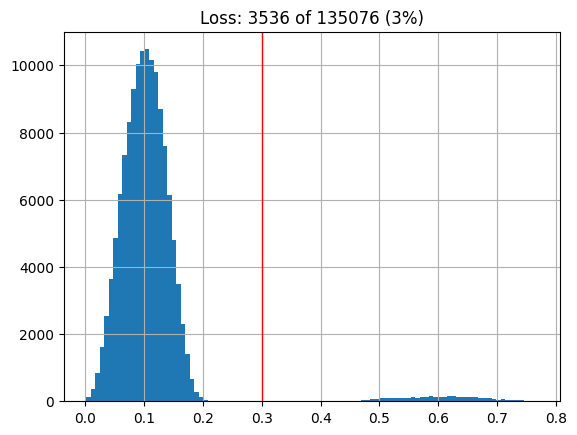

time: 229 ms (started: 2023-05-31 13:43:53 -05:00)


In [10]:
x = df_edges_std["std"]
plt.hist(x, bins=100)
plt.axvline(x=0.3, color="red", lw=1)
l = len(df_edges_std) - len(df_edges_std_filter)
t = len(df_edges_std)
plt.title("Loss: {} of {} ({}%)".format(l, t, round(l*100/t)))
plt.grid()
plt.show()

In [11]:
G = nx.from_pandas_edgelist(df_edges_std_filter, "source", "target", edge_attr=["weight"])
graph_detail(G)

list_graphs.append(G.copy())
nx.write_gexf(G, "{}/output_greedy/graphs_filter/greedy_{}_graph-filter-std.gexf".format(dir, group[0]))

Num. nodes: 4181
Num. edges: 131540

time: 3.46 s (started: 2023-05-31 13:43:53 -05:00)


In [12]:
df_edges_filter = nx.to_pandas_edgelist(G)
df_edges_filter.to_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-std.csv".format(dir, group[0]), index=False)
df_edges_filter

,source,target,weight
0,59.0137,59.0291,0.859127
1,59.0137,349.2758,0.701044
2,59.0137,350.2793,0.706849
3,59.0137,350.3033,0.736142
4,59.0137,389.2739,0.773249
...,...,...,...
131535,978.6174,978.6600,0.628246
131536,979.6191,979.6627,0.679891
131537,980.0763,980.0986,0.736160
131538,985.5091,985.5490,0.724017


time: 2.14 s (started: 2023-05-31 13:43:57 -05:00)


ANOVA

In [13]:
# ANOVA
df_nodes_anova = get_nodes_anova(G, dir, group)
df_nodes_anova

# Filter by ANOVA (p > 0.001)
df_nodes_anova_filter = df_nodes_anova[df_nodes_anova["p-value"] > 0.001]
df_nodes_anova_filter
nodes = list(df_nodes_anova_filter.index)
df_nodes_anova_filter

,p-value
ionMz,
61.9884,0.020338
293.1786,0.023086
123.0266,0.001355
122.9910,0.001152
123.0007,0.001065
...,...
980.0763,0.916107
980.0986,0.725725
985.5091,0.174436


time: 3.49 s (started: 2023-05-31 13:43:59 -05:00)


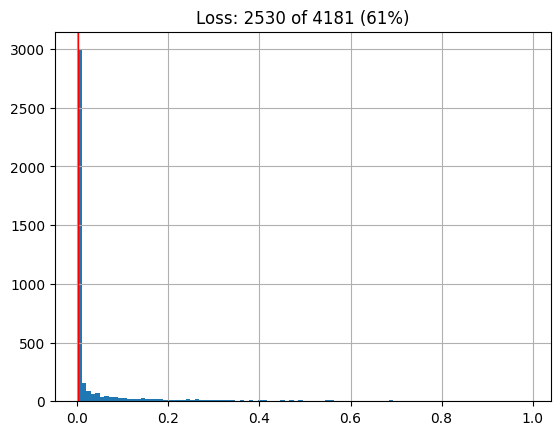

time: 201 ms (started: 2023-05-31 13:44:03 -05:00)


In [14]:
x = df_nodes_anova["p-value"]
plt.hist(x, bins=100)
plt.axvline(x=0.001, color="red", lw=1)
l = len(df_nodes_anova) - len(df_nodes_anova_filter)
t = len(df_nodes_anova)
plt.title("Loss: {} of {} ({}%)".format(l, t, round(l*100/t)))
plt.grid()
plt.show()

In [15]:
H = G.subgraph(nodes)
graph_detail(H)
print(len(list(n for n in H.nodes() if H.degree(n) == 0)))

list_graphs.append(H.copy())
nx.write_gexf(H, "{}/output_greedy/graphs_filter/greedy_{}_graph-filter-std-anova.gexf".format(dir, group[0]))

df_edges_filter = nx.to_pandas_edgelist(H)

df_edges_filter.to_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-std-anova.csv".format(dir, group[0]), index=False)
df_edges_filter

Num. nodes: 1651
Num. edges: 11868

199


,source,target,weight
0,61.9884,293.1786,0.596832
1,122.9910,123.0007,0.989721
2,122.9910,123.0188,0.969324
3,122.9910,123.0360,0.900589
4,122.9910,123.9906,0.952875
...,...,...,...
11863,492.9771,493.0401,0.805087
11864,494.9997,495.0368,0.774382
11865,504.1338,504.0519,0.676079
11866,505.1609,505.1361,0.764508


time: 558 ms (started: 2023-05-31 13:44:03 -05:00)


### ANOVA-STD

ANOVA

In [16]:
# ANOVA
df_nodes_anova = get_nodes_anova(SG, dir, group)
df_nodes_anova

# Filter by ANOVA (p > 0.001)
df_nodes_anova_filter = df_nodes_anova[df_nodes_anova["p-value"] > 0.001]
df_nodes_anova_filter
nodes = list(df_nodes_anova_filter.index)
df_nodes_anova_filter

,p-value
ionMz,
517.1517,0.037692
543.1735,0.015026
543.2397,0.273076
476.1456,0.006244
497.1259,0.017647
...,...
789.4528,0.048489
808.6237,0.090820
397.1632,0.557960


time: 1.89 s (started: 2023-05-31 13:44:04 -05:00)


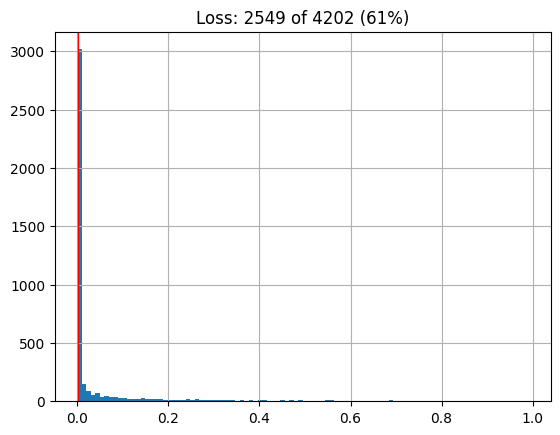

time: 209 ms (started: 2023-05-31 13:44:05 -05:00)


In [17]:
x = df_nodes_anova["p-value"]
plt.hist(x, bins=100)
plt.axvline(x=0.001, color="red", lw=1)
l = len(df_nodes_anova) - len(df_nodes_anova_filter)
t = len(df_nodes_anova)
plt.title("Loss: {} of {} ({}%)".format(l, t, round(l*100/t)))
plt.grid()
plt.show()

In [18]:
H = SG.subgraph(nodes)

time: 1.7 ms (started: 2023-05-31 13:44:06 -05:00)


In [19]:
df_edges_filter = nx.to_pandas_edgelist(H)
df_edges_filter.to_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-anova.csv".format(dir, group[0]), index=False)
df_edges_filter

,source,target
0,61.9884,293.1786
1,122.9910,123.0007
2,122.9910,123.9906
3,122.9910,123.0188
4,122.9910,124.9664
...,...,...
11965,475.1307,507.1555
11966,480.0275,480.0419
11967,492.9771,493.0401
11968,171.0467,171.0302


time: 177 ms (started: 2023-05-31 13:44:06 -05:00)


In [20]:
H = nx.from_pandas_edgelist(df_edges_filter, "source", "target")
graph_detail(H)

list_graphs.append(H.copy())
nx.write_gexf(H, "{}/output_greedy/graphs_filter/greedy_{}_graph-filter-anova.gexf".format(dir, group[0]))

Num. nodes: 1452
Num. edges: 11970

time: 1.69 s (started: 2023-05-31 13:44:06 -05:00)


STD

In [21]:
# STD
df_edges_std = get_edges_std(H, dir, group, subgroups, ddof=0)
df_edges_std

# Filter by std (std < 0.3)
df_edges_std_filter = df_edges_std[df_edges_std["std"] < 0.3]
df_edges_std_filter

100%|██████████| 5/5 [00:16<00:00,  3.20s/it]


,source,target,weight,std
0,61.9884,293.1786,0.596832,0.076383
31,122.9910,123.0007,0.989721,0.018039
33,122.9910,123.0188,0.969324,0.049914
36,122.9910,123.0360,0.900589,0.167513
32,122.9910,123.9906,0.952875,0.066730
...,...,...,...,...
11753,978.3602,978.3779,0.789932,0.097692
11951,978.6174,978.6600,0.628246,0.071524
11750,979.6191,979.6627,0.679891,0.082784
11952,980.0763,980.0986,0.736160,0.111510


time: 16.1 s (started: 2023-05-31 13:44:08 -05:00)


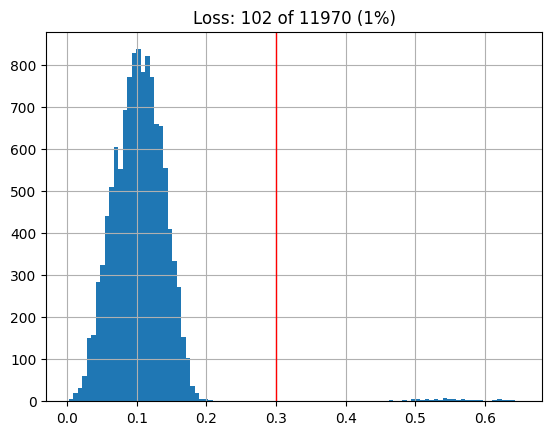

time: 221 ms (started: 2023-05-31 13:44:24 -05:00)


In [22]:
x = df_edges_std["std"]
plt.hist(x, bins=100)
plt.axvline(x=0.3, color="red", lw=1)
l = len(df_edges_std) - len(df_edges_std_filter)
t = len(df_edges_std)
plt.title("Loss: {} of {} ({}%)".format(l, t, round(l*100/t)))
plt.grid()
plt.show()

In [23]:
G = nx.from_pandas_edgelist(df_edges_std_filter, "source", "target", edge_attr=["weight"])
graph_detail(G)

list_graphs.append(G.copy())
nx.write_gexf(G, "{}/output_greedy/graphs_filter/greedy_{}_graph-filter-anova-std.gexf".format(dir, group[0]))

Num. nodes: 1452
Num. edges: 11868

time: 201 ms (started: 2023-05-31 13:44:24 -05:00)


In [24]:
df_edges_filter = nx.to_pandas_edgelist(G)
df_edges_filter.to_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-anova-std.csv".format(dir, group[0]), index=False)
df_edges_filter

,source,target,weight
0,61.9884,293.1786,0.596832
1,293.1786,265.1480,0.944443
2,293.1786,266.1514,0.932479
3,293.1786,267.1457,0.767931
4,293.1786,294.1818,0.913458
...,...,...,...
11863,978.3602,978.3779,0.789932
11864,978.6174,978.6600,0.628246
11865,979.6191,979.6627,0.679891
11866,980.0763,980.0986,0.736160


time: 118 ms (started: 2023-05-31 13:44:25 -05:00)


### Results

In [25]:
for graph in list_graphs:
    graph_detail(graph)

Num. nodes: 4202
Num. edges: 135076

Num. nodes: 4181
Num. edges: 131540

Num. nodes: 1651
Num. edges: 11868

Num. nodes: 1452
Num. edges: 11970

Num. nodes: 1452
Num. edges: 11868

time: 9.59 ms (started: 2023-05-31 13:44:25 -05:00)
